In [ ]:
# importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# loading and analysing data through eda 

In [2]:
df=pd.read_csv('water_potability.csv')

In [3]:
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [4]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [5]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [6]:
df.shape

(3276, 10)

In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
# imbalance data 

In [10]:
df['Potability']

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [11]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [12]:
len(df)

3276

In [13]:
print(len(df[df['Potability']==0])/len(df)*100)
print(len(df[df['Potability']==1])/len(df)*100)

60.98901098901099
39.010989010989015


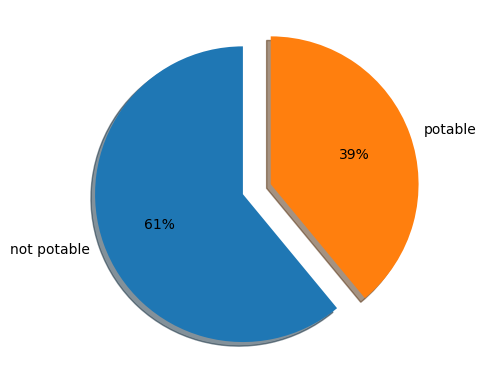

In [14]:
plt.pie(df['Potability'].value_counts(),autopct='%1.0f%%',shadow=True,startangle=90,
       labels=['not potable','potable'],explode=(0,0.2))

plt.show()

In [15]:
# missing data 

In [17]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [18]:
round(df.isnull().mean()*100,2)

ph                 14.99
Hardness            0.00
Solids              0.00
Chloramines         0.00
Sulfate            23.84
Conductivity        0.00
Organic_carbon      0.00
Trihalomethanes     4.95
Turbidity           0.00
Potability          0.00
dtype: float64

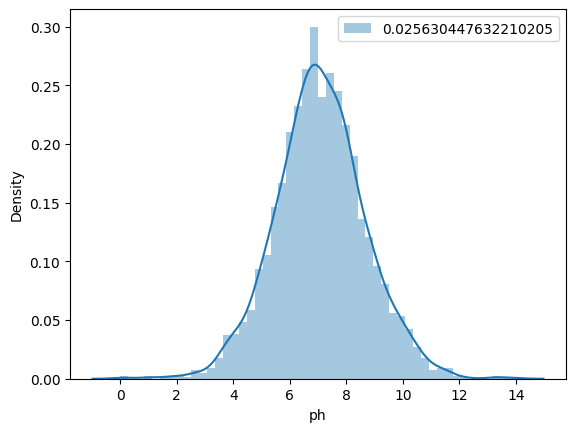

In [19]:
sns.distplot(df['ph'],label=df.ph.skew())
plt.legend()

In [20]:
df.ph.mean()

7.080794504276835

In [21]:
df.ph.median()

7.036752103833548

In [22]:
for i in df:
    if df[i].isna().sum()>0:
        print(i)

ph
Sulfate
Trihalomethanes


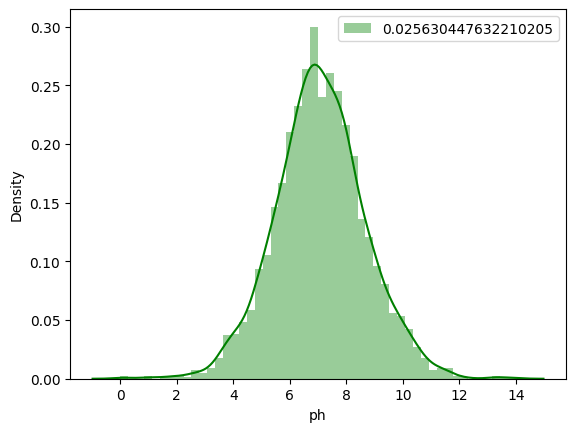

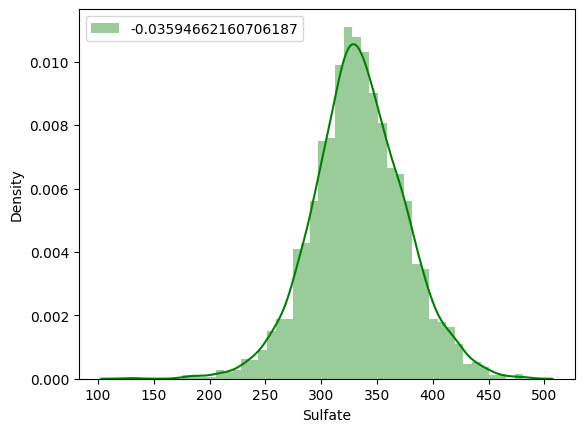

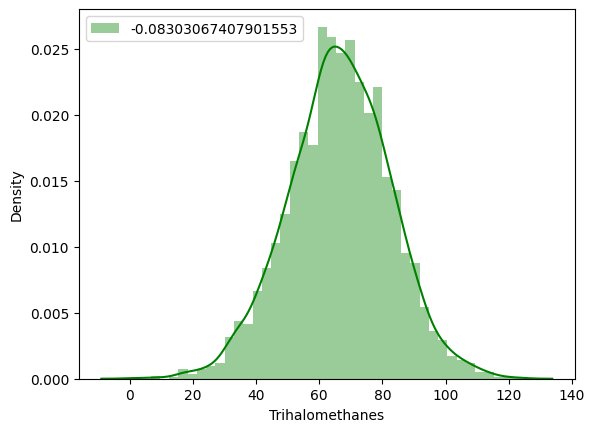

In [24]:
cols=np.random.choice(['r','g','b'])
for i in df:
    if df[i].isna().sum()>0:
        sns.distplot(df[i],color=cols,label=df[i].skew())
        plt.legend()
        plt.show()

In [25]:
for i in df:
    if df[i].isna().sum()>0:
        print(f'{i} : {df[i].mean()}')
        

ph : 7.080794504276835
Sulfate : 333.7757766108135
Trihalomethanes : 66.39629294676803


In [26]:
for i in df:
    if df[i].isna().sum()>0:
        print(f'{i} : {df[i].mean()}')
        df[i].fillna(df[i].mean(),inplace=True)

ph : 7.080794504276835
Sulfate : 333.7757766108135
Trihalomethanes : 66.39629294676803


In [27]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [28]:
# duplicate data 

In [29]:
df.duplicated().sum()

0

In [30]:
df[df.duplicated()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


In [31]:
# outliers 

In [34]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
IQR

ph                     1.592377
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               33.291119
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       20.018954
Turbidity              1.060609
Potability             1.000000
dtype: float64

In [35]:
print(q1-1.5*IQR)
print()
print(q3+1.5*IQR)

ph                    3.889107
Hardness            117.125160
Solids            -1832.417449
Chloramines           3.146221
Sulfate             267.157960
Conductivity        191.647579
Organic_carbon        5.328026
Trihalomethanes      26.619225
Turbidity             1.848797
Potability           -1.500000
dtype: float64

ph                    10.258615
Hardness             276.392834
Solids             44831.869873
Chloramines           11.096086
Sulfate              400.322434
Conductivity         655.879140
Organic_carbon        23.295427
Trihalomethanes      106.695040
Turbidity              6.091233
Potability             2.500000
dtype: float64


In [36]:
upper=q3+1.5*IQR
lower=q1-1.5*IQR

In [37]:
df.shape

(3276, 10)

In [40]:
data=df[~((df<lower)|(df>upper)).any(axis=1)]
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


<Axes: ylabel='ph'>

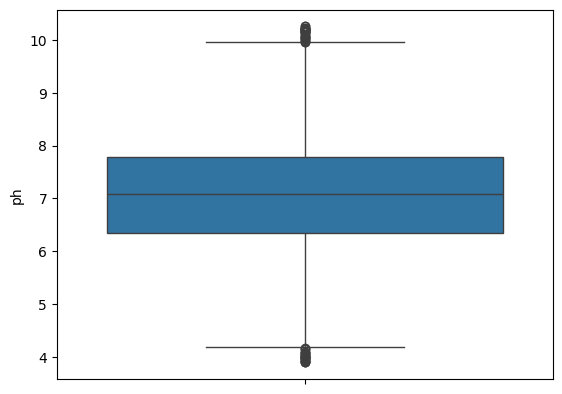

In [41]:
sns.boxplot(data['ph'])

In [42]:
data.shape

(2666, 10)

In [43]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [44]:
# feature selection 

In [45]:
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.131362,-0.087036,-0.062888,0.016894,0.001943,0.026160,0.009172,-0.043034,-0.005949
Hardness,0.131362,1.000000,-0.045552,-0.035832,-0.027939,-0.030415,0.012463,-0.007093,-0.022362,-0.000710
Solids,-0.087036,-0.045552,1.000000,-0.040392,-0.110090,0.007087,0.026793,-0.024550,0.022801,0.005600
Chloramines,-0.062888,-0.035832,-0.040392,1.000000,0.024502,-0.015277,-0.000684,0.016574,-0.005415,0.013195
Sulfate,0.016894,-0.027939,-0.110090,0.024502,1.000000,-0.005850,-0.007588,-0.022269,-0.017310,-0.003741
Conductivity,0.001943,-0.030415,0.007087,-0.015277,-0.005850,1.000000,0.006515,-0.001138,0.007674,-0.001886
Organic_carbon,0.026160,0.012463,0.026793,-0.000684,-0.007588,0.006515,1.000000,-0.000059,-0.016705,-0.027090
Trihalomethanes,0.009172,-0.007093,-0.024550,0.016574,-0.022269,-0.001138,-0.000059,1.000000,-0.024269,0.014351
Turbidity,-0.043034,-0.022362,0.022801,-0.005415,-0.017310,0.007674,-0.016705,-0.024269,1.000000,0.004761
Potability,-0.005949,-0.000710,0.005600,0.013195,-0.003741,-0.001886,-0.027090,0.014351,0.004761,1.000000


In [46]:
data.corr()['Potability']

ph                -0.005949
Hardness          -0.000710
Solids             0.005600
Chloramines        0.013195
Sulfate           -0.003741
Conductivity      -0.001886
Organic_carbon    -0.027090
Trihalomethanes    0.014351
Turbidity          0.004761
Potability         1.000000
Name: Potability, dtype: float64

In [47]:
# seperate dependent and independent 

In [48]:
X=data.iloc[:,:-1]
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [49]:
y=data['Potability']
y

0       0
2       0
3       0
4       0
5       0
       ..
3270    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 2666, dtype: int64

In [50]:
# splitting data 

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
# feature selection 

In [53]:
sc=StandardScaler()

In [54]:
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)

In [55]:
X_test_sc

array([[ 0.76955275,  0.0591837 ,  2.49249786, ..., -0.07283378,
         0.16249225, -0.52065935],
       [-1.37679259, -0.49759241, -0.77389725, ...,  1.02418171,
        -1.04356868, -1.15747579],
       [-0.50185216, -0.87086   , -0.85715381, ..., -1.40586274,
        -0.60781891,  0.9004857 ],
       ...,
       [-1.46694886,  0.23524254,  0.15325569, ..., -0.16535897,
         1.1010898 , -1.35989889],
       [ 0.35343507, -0.42462971,  0.42181357, ...,  0.19609378,
         0.55484498, -0.21437106],
       [ 0.26376863,  0.44151539,  1.28298512, ...,  0.76844349,
        -1.60818106, -0.33879065]])

In [56]:
X_train_sc

array([[ 1.08790956,  2.09056478, -0.59647931, ..., -1.05584236,
        -0.76370666, -0.13696497],
       [-1.74032936, -1.54115475, -0.18021947, ..., -0.74586468,
         0.12902908, -0.11598472],
       [ 0.0119423 , -1.41562152,  0.19157245, ...,  1.52916801,
         1.0208548 ,  2.11818687],
       ...,
       [ 0.35677911,  0.49545104,  0.26969765, ...,  1.1716937 ,
        -0.91406427,  0.65386741],
       [ 0.55136958,  0.99173017, -0.2579827 , ...,  0.27335131,
         0.56043327, -0.33985365],
       [ 0.0119423 ,  2.10605667, -1.585393  , ...,  0.79325653,
         0.41990686, -0.77401858]])

In [57]:
# logistic regression 

In [58]:
### on original data 

In [59]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [63]:
print(f'Training accuracy:{lr.score(X_train,y_train)} ')
print(f'Test accuracy:{lr.score(X_test,y_test)} ')

Training accuracy:0.623358348968105 
Test accuracy:0.6404494382022472 


In [64]:
# on scaled data 

In [65]:
lr=LogisticRegression()
lr.fit(X_train_sc,y_train)

LogisticRegression()

In [66]:
print(f'Training accuracy:{lr.score(X_train_sc,y_train)} ')
print(f'Test accuracy:{lr.score(X_test_sc,y_test)} ')

Training accuracy:0.623358348968105 
Test accuracy:0.6404494382022472 


In [67]:
# decision tree 

In [68]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [69]:
print(f'Training accuracy:{dt.score(X_train,y_train)} ')
print(f'Test accuracy:{dt.score(X_test,y_test)} ')

Training accuracy:0.6965290806754222 
Test accuracy:0.6329588014981273 


In [ ]:
# xgb

In [70]:
xgb=XGBClassifier(gamma=0.7,reg_alpha=0.5,red_lambda=0.2)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.7, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
print(f'Training accuracy{xgb.score(X_train,y_train)} ')
print(f'Test accuracy{xgb.score(X_test,y_test)} ')

Training accuracy0.8583489681050657 
Test accuracy0.649812734082397 


In [76]:
y_train_pred_xgb=xgb.predict(X_train)
y_test_pred_xgb=xgb.predict(X_test)

In [77]:
# model evaluation

<Axes: >

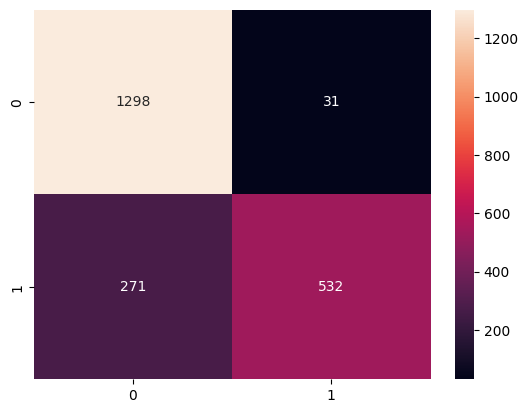

In [78]:
sns.heatmap(confusion_matrix(y_train,y_train_pred_xgb),annot=True,fmt='.4g')

In [79]:
accuracy_score(y_train,y_train_pred_xgb)

0.8583489681050657

In [80]:
print(classification_report(y_train,y_train_pred_xgb))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1329
           1       0.94      0.66      0.78       803

    accuracy                           0.86      2132
   macro avg       0.89      0.82      0.84      2132
weighted avg       0.87      0.86      0.85      2132



<Axes: >

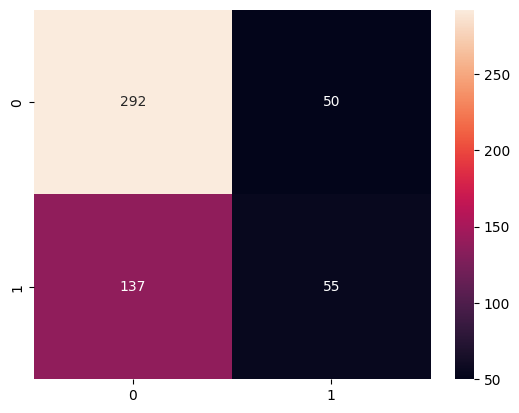

In [81]:
sns.heatmap(confusion_matrix(y_test,y_test_pred_xgb),annot=True,fmt='.4g')

In [83]:
accuracy_score(y_test,y_test_pred_xgb)

0.649812734082397

In [87]:
parameters= {
    'n_estimators':[100,200],
    'learning_rate':[0.1,0.01,1.0,0.05],
    'max_depth':[3,4,5],
    'gamma':[0.2,0.3],
    'reg_alpha':[0.1,0.2,1],
    'reg_lambda':[0.1,1]
}
parameters

{'n_estimators': [100, 200],
 'learning_rate': [0.1, 0.01, 1.0, 0.05],
 'max_depth': [3, 4, 5],
 'gamma': [0.2, 0.3],
 'reg_alpha': [0.1, 0.2, 1],
 'reg_lambda': [0.1, 1]}

In [88]:
grid_search=GridSearchCV(estimator=xgb,param_grid=parameters,scoring='accuracy',
                        cv=5,verbose=3)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.630 total time=   0.1s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.616 total time=   0.1s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.660 total time=   0.1s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.638 total time=   0.1s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.646 total time=   0.1s
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.616 total time=   0.1s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.611 

[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.611 total time=   0.2s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.650 total time=   0.2s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.627 total time=   0.2s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.657 total time=   0.2s
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.632 total time=   0.2s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.639 total time=   0.2s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.671 total time=   0.2s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_

[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.676 total time=   0.3s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.622 total time=   0.3s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.657 total time=   0.2s
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.604 total time=   0.3s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.614 total time=   0.3s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.662 total time=   0.3s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.634 total time=   0.2s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_de

[CV 4/5] END gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.634 total time=   0.1s
[CV 5/5] END gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.629 total time=   0.1s
[CV 1/5] END gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.628 total time=   0.1s
[CV 2/5] END gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.637 total time=   0.1s
[CV 3/5] END gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.638 total time=   0.2s
[CV 4/5] END gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.636 total time=   0.1s
[CV 5/5] END gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.636 total time=   0.1s
[CV 1/5] END gamma=0.2, learning_rate=0.01, 

[CV 5/5] END gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.636 total time=   0.2s
[CV 1/5] END gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.632 total time=   0.2s
[CV 2/5] END gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.637 total time=   0.2s
[CV 3/5] END gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.653 total time=   0.2s
[CV 4/5] END gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.641 total time=   0.2s
[CV 5/5] END gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.636 total time=   0.2s
[CV 1/5] END gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.642 total time=   0.3s
[CV 2/5] END gamma=0.2, learning_rate=0.01, 

[CV 1/5] END gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.637 total time=   0.3s
[CV 2/5] END gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.618 total time=   0.3s
[CV 3/5] END gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.662 total time=   0.3s
[CV 4/5] END gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.648 total time=   0.3s
[CV 5/5] END gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.646 total time=   0.3s
[CV 1/5] END gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.635 total time=   0.3s
[CV 2/5] END gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.628 total time=   0.4s
[CV 3/5] END gamma=0.2, learning_rate=0.01, 

[CV 2/5] END gamma=0.2, learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.550 total time=   0.1s
[CV 3/5] END gamma=0.2, learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.592 total time=   0.1s
[CV 4/5] END gamma=0.2, learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.606 total time=   0.1s
[CV 5/5] END gamma=0.2, learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.608 total time=   0.1s
[CV 1/5] END gamma=0.2, learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.574 total time=   0.1s
[CV 2/5] END gamma=0.2, learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.585 total time=   0.1s
[CV 3/5] END gamma=0.2, learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.603 total time=   0.1s
[CV 4/5] END gamma=0.2, learning_rate=1.0, max_de

[CV 3/5] END gamma=0.2, learning_rate=1.0, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.622 total time=   0.1s
[CV 4/5] END gamma=0.2, learning_rate=1.0, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.577 total time=   0.1s
[CV 5/5] END gamma=0.2, learning_rate=1.0, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.615 total time=   0.2s
[CV 1/5] END gamma=0.2, learning_rate=1.0, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.604 total time=   0.2s
[CV 2/5] END gamma=0.2, learning_rate=1.0, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.590 total time=   0.1s
[CV 3/5] END gamma=0.2, learning_rate=1.0, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.631 total time=   0.1s
[CV 4/5] END gamma=0.2, learning_rate=1.0, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.594 total time=   0.1s
[CV 5/5] END gamma=0.2, learning_rate=1.0, max_

[CV 4/5] END gamma=0.2, learning_rate=1.0, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.577 total time=   0.1s
[CV 5/5] END gamma=0.2, learning_rate=1.0, max_depth=5, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.620 total time=   0.1s
[CV 1/5] END gamma=0.2, learning_rate=1.0, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.569 total time=   0.1s
[CV 2/5] END gamma=0.2, learning_rate=1.0, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.560 total time=   0.2s
[CV 3/5] END gamma=0.2, learning_rate=1.0, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.620 total time=   0.1s
[CV 4/5] END gamma=0.2, learning_rate=1.0, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.582 total time=   0.1s
[CV 5/5] END gamma=0.2, learning_rate=1.0, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.608 total time=   0.1s
[CV 1/5] END gamma=0.2, learning_rate=1.0, ma

[CV 5/5] END gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.655 total time=   0.1s
[CV 1/5] END gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.621 total time=   0.1s
[CV 2/5] END gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.616 total time=   0.1s
[CV 3/5] END gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.667 total time=   0.1s
[CV 4/5] END gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.634 total time=   0.1s
[CV 5/5] END gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.650 total time=   0.1s
[CV 1/5] END gamma=0.2, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.625 total time=   0.1s
[CV 2/5] END gamma=0.2, learning_rate=

[CV 1/5] END gamma=0.2, learning_rate=0.05, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.630 total time=   0.2s
[CV 2/5] END gamma=0.2, learning_rate=0.05, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.616 total time=   0.2s
[CV 3/5] END gamma=0.2, learning_rate=0.05, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.662 total time=   0.2s
[CV 4/5] END gamma=0.2, learning_rate=0.05, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.627 total time=   0.2s
[CV 5/5] END gamma=0.2, learning_rate=0.05, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.664 total time=   0.2s
[CV 1/5] END gamma=0.2, learning_rate=0.05, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.632 total time=   0.2s
[CV 2/5] END gamma=0.2, learning_rate=0.05, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.621 total time=   0.2s
[CV 3/5] END gamma=0.2, learning_rate=

[CV 2/5] END gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.611 total time=   0.2s
[CV 3/5] END gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.648 total time=   0.3s
[CV 4/5] END gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.650 total time=   0.3s
[CV 5/5] END gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.657 total time=   0.2s
[CV 1/5] END gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.632 total time=   0.2s
[CV 2/5] END gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.625 total time=   0.1s
[CV 3/5] END gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.664 total time=   0.3s
[CV 4/5] END gamma=0.2, learning_rate=0.

[CV 3/5] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.664 total time=   0.1s
[CV 4/5] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.622 total time=   0.1s
[CV 5/5] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.655 total time=   0.1s
[CV 1/5] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.625 total time=   0.1s
[CV 2/5] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.635 total time=   0.1s
[CV 3/5] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.671 total time=   0.1s
[CV 4/5] END gamma=0.3, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.624 total time=   0.1s
[CV 5/5] END gamma=0.3, learning_rate=0.1, max_de

[CV 4/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.615 total time=   0.2s
[CV 5/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.657 total time=   0.2s
[CV 1/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.616 total time=   0.2s
[CV 2/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.639 total time=   0.2s
[CV 3/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.662 total time=   0.1s
[CV 4/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.617 total time=   0.2s
[CV 5/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.650 total time=   0.2s
[CV 1/5] END gamma=0.3, learning_rate=0.1, max_dept

[CV 5/5] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=0.1;, score=0.662 total time=   0.3s
[CV 1/5] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.616 total time=   0.3s
[CV 2/5] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.609 total time=   0.3s
[CV 3/5] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.657 total time=   0.2s
[CV 4/5] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.638 total time=   0.3s
[CV 5/5] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.662 total time=   0.3s
[CV 1/5] END gamma=0.3, learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=0.1;, score=0.623 total time=   0.2s
[CV 2/5] END gamma=0.3, learning_rate=0.1, max_depth=

[CV 1/5] END gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.625 total time=   0.1s
[CV 2/5] END gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.637 total time=   0.1s
[CV 3/5] END gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.636 total time=   0.2s
[CV 4/5] END gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.634 total time=   0.2s
[CV 5/5] END gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.636 total time=   0.2s
[CV 1/5] END gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.1;, score=0.628 total time=   0.1s
[CV 2/5] END gamma=0.3, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.1;, score=0.637 total time=   0.1s
[CV 3/5] END gamma=0.3, learning_rate=0.01, max_

[CV 2/5] END gamma=0.3, learning_rate=0.01, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.637 total time=   0.2s
[CV 3/5] END gamma=0.3, learning_rate=0.01, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.653 total time=   0.2s
[CV 4/5] END gamma=0.3, learning_rate=0.01, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.641 total time=   0.2s
[CV 5/5] END gamma=0.3, learning_rate=0.01, max_depth=4, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.636 total time=   0.2s
[CV 1/5] END gamma=0.3, learning_rate=0.01, max_depth=4, n_estimators=100, reg_alpha=1, reg_lambda=0.1;, score=0.630 total time=   0.2s
[CV 2/5] END gamma=0.3, learning_rate=0.01, max_depth=4, n_estimators=100, reg_alpha=1, reg_lambda=0.1;, score=0.630 total time=   0.2s
[CV 3/5] END gamma=0.3, learning_rate=0.01, max_depth=4, n_estimators=100, reg_alpha=1, reg_lambda=0.1;, score=0.655 total time=   0.2s
[CV 4/5] END gamma=0.3, learning_rate=0.01, max_

[CV 3/5] END gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.664 total time=   0.3s
[CV 4/5] END gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.650 total time=   0.4s
[CV 5/5] END gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.648 total time=   0.3s
[CV 1/5] END gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=0.1;, score=0.637 total time=   0.3s
[CV 2/5] END gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=0.1;, score=0.614 total time=   0.3s
[CV 3/5] END gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=0.1;, score=0.671 total time=   0.3s
[CV 4/5] END gamma=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=0.1;, score=0.655 total time=   0.2s
[CV 5/5] END gamma=0.3, learning_rate=0.01, max_

[CV 5/5] END gamma=0.3, learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=0.2, reg_lambda=1;, score=0.608 total time=   0.0s
[CV 1/5] END gamma=0.3, learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.1;, score=0.567 total time=   0.0s
[CV 2/5] END gamma=0.3, learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.1;, score=0.569 total time=   0.0s
[CV 3/5] END gamma=0.3, learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.1;, score=0.587 total time=   0.0s
[CV 4/5] END gamma=0.3, learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.1;, score=0.620 total time=   0.0s
[CV 5/5] END gamma=0.3, learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=0.1;, score=0.577 total time=   0.0s
[CV 1/5] END gamma=0.3, learning_rate=1.0, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1;, score=0.571 total time=   0.0s
[CV 2/5] END gamma=0.3, learning_rate=1.0, max_depth=3, n

[CV 3/5] END gamma=0.3, learning_rate=1.0, max_depth=4, n_estimators=100, reg_alpha=1, reg_lambda=0.1;, score=0.624 total time=   0.0s
[CV 4/5] END gamma=0.3, learning_rate=1.0, max_depth=4, n_estimators=100, reg_alpha=1, reg_lambda=0.1;, score=0.587 total time=   0.0s
[CV 5/5] END gamma=0.3, learning_rate=1.0, max_depth=4, n_estimators=100, reg_alpha=1, reg_lambda=0.1;, score=0.582 total time=   0.0s
[CV 1/5] END gamma=0.3, learning_rate=1.0, max_depth=4, n_estimators=100, reg_alpha=1, reg_lambda=1;, score=0.574 total time=   0.0s
[CV 2/5] END gamma=0.3, learning_rate=1.0, max_depth=4, n_estimators=100, reg_alpha=1, reg_lambda=1;, score=0.578 total time=   0.0s
[CV 3/5] END gamma=0.3, learning_rate=1.0, max_depth=4, n_estimators=100, reg_alpha=1, reg_lambda=1;, score=0.636 total time=   0.0s
[CV 4/5] END gamma=0.3, learning_rate=1.0, max_depth=4, n_estimators=100, reg_alpha=1, reg_lambda=1;, score=0.587 total time=   0.0s
[CV 5/5] END gamma=0.3, learning_rate=1.0, max_depth=4, n_estim

[CV 1/5] END gamma=0.3, learning_rate=1.0, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1;, score=0.588 total time=   0.0s
[CV 2/5] END gamma=0.3, learning_rate=1.0, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1;, score=0.600 total time=   0.0s
[CV 3/5] END gamma=0.3, learning_rate=1.0, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1;, score=0.622 total time=   0.0s
[CV 4/5] END gamma=0.3, learning_rate=1.0, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1;, score=0.610 total time=   0.0s
[CV 5/5] END gamma=0.3, learning_rate=1.0, max_depth=5, n_estimators=100, reg_alpha=1, reg_lambda=1;, score=0.601 total time=   0.0s
[CV 1/5] END gamma=0.3, learning_rate=1.0, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1;, score=0.595 total time=   0.0s
[CV 2/5] END gamma=0.3, learning_rate=1.0, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1;, score=0.602 total time=   0.0s
[CV 3/5] END gamma=0.3, learning_rate=1.0, max_depth=5, n_est

[CV 2/5] END gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1;, score=0.623 total time=   0.0s
[CV 3/5] END gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1;, score=0.674 total time=   0.0s
[CV 4/5] END gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1;, score=0.631 total time=   0.0s
[CV 5/5] END gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=1;, score=0.646 total time=   0.0s
[CV 1/5] END gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1;, score=0.616 total time=   0.0s
[CV 2/5] END gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1;, score=0.623 total time=   0.0s
[CV 3/5] END gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1;, score=0.667 total time=   0.0s
[CV 4/5] END gamma=0.3, learning_rate=0.05, max_de

[CV 1/5] END gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1;, score=0.609 total time=   0.0s
[CV 2/5] END gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1;, score=0.607 total time=   0.0s
[CV 3/5] END gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1;, score=0.648 total time=   0.0s
[CV 4/5] END gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1;, score=0.634 total time=   0.1s
[CV 5/5] END gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1;, score=0.650 total time=   0.1s
[CV 1/5] END gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=200, reg_alpha=0.1, reg_lambda=1;, score=0.623 total time=   0.1s
[CV 2/5] END gamma=0.3, learning_rate=0.05, max_depth=4, n_estimators=200, reg_alpha=0.1, reg_lambda=1;, score=0.637 total time=   0.0s
[CV 3/5] END gamma=0.3, learning_rate=

[CV 2/5] END gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1;, score=0.609 total time=   0.1s
[CV 3/5] END gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1;, score=0.667 total time=   0.1s
[CV 4/5] END gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1;, score=0.624 total time=   0.1s
[CV 5/5] END gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=0.1;, score=0.643 total time=   0.1s
[CV 1/5] END gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1;, score=0.602 total time=   0.0s
[CV 2/5] END gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1;, score=0.611 total time=   0.1s
[CV 3/5] END gamma=0.3, learning_rate=0.05, max_depth=5, n_estimators=200, reg_alpha=0.1, reg_lambda=1;, score=0.664 total time=   0.1s
[CV 4/5] END gamma=0.3, learning_rate=0.

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.7,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.2, 0.3],
                         'learning_rate': [0.1, 0.01, 1.0, 0.05],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200],
                         'reg_alpha': [0.1, 0.2, 1], 'reg_lambda': [0.1, 1]},
             scoring='accuracy', verbose=3)

In [89]:

print(f'best selected parameters : {grid_search.best_params_}')
print(f'best estimators:{grid_search.best_estimator_}')

best selected parameters : {'gamma': 0.3, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 0.1}
best estimators:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [90]:
print(f'Training accuracy{grid_search.score(X_train,y_train)} ')
print(f'Test accuracy{grid_search.score(X_test,y_test)} ')

Training accuracy0.8030018761726079 
Test accuracy0.6554307116104869 
